# K-nearest Neighbours (k-NN)


Load iris dataset (built-in dataset from sklearn), initialise k-NN model object and fit the model to the data. 

In [1]:
import seaborn as sns

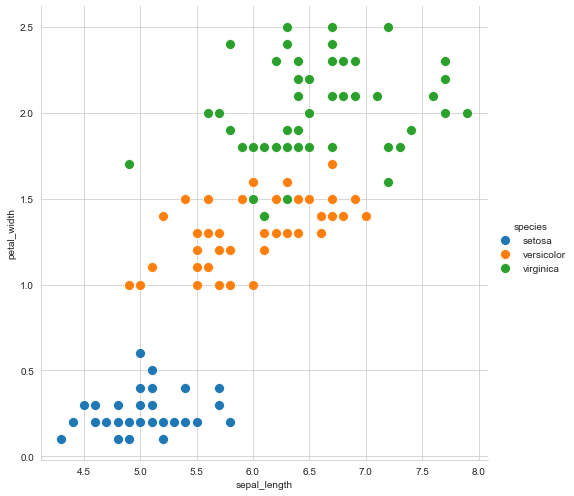

In [2]:
df = sns.load_dataset('iris')
sns.set_style("whitegrid")

g = sns.FacetGrid(df, hue="species", height=7)
g.map_dataframe(sns.scatterplot, x="sepal_length", y="petal_width", s=100)
g.add_legend()

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

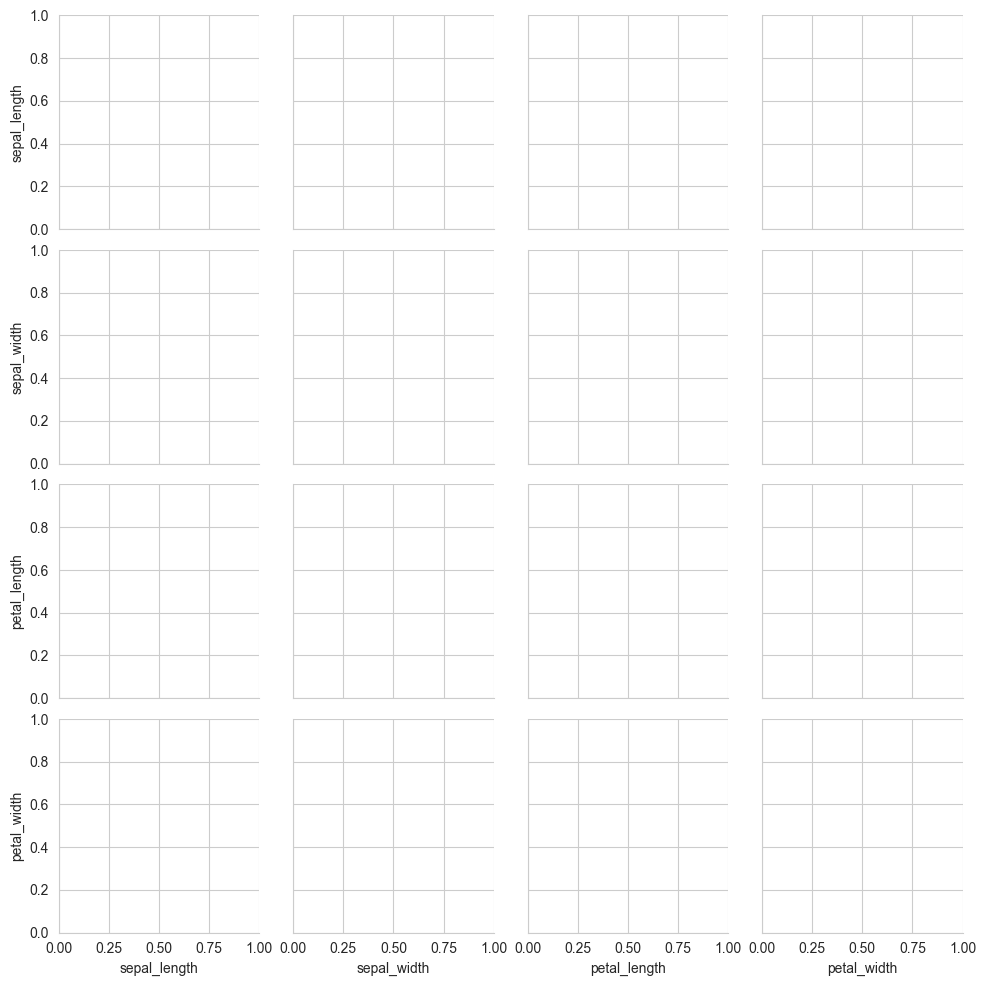

In [6]:
# Creating a pairplot with Seaborn

sns.pairplot(df, hue="species", palette="husl", markers=["o", "s", "D"])

In [8]:
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

print(knn)

KNeighborsClassifier()


## Checking model prediction

What kind of iris flower that has 3cm x 4cm sepal and 1cm x 5cm petal?

In [11]:
result = knn.predict([[8,4,8,5],])

print(iris.target_names[result])

['virginica']


Prediction probability

In [14]:
knn.predict_proba([[1,4,1,5],])

array([[1., 0., 0.]])

## Visualise k-NN predictions

In [19]:
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF", "#FFAAAA", "#AAFFAA"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000ff", "#FF0000", "#00FF00"])

def plot_iris_knn():
  X = iris.data[:, :2]
  y = iris.target

  knn = neighbors.KNeighborsClassifier(n_neighbors=5)
  knn.fit(X,y)

  x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
  y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

  #put the result into a colour plot
  Z = Z.reshape(xx.shape)
  pl.figure()
  pl.pcolormesh(xx,yy,Z, cmap=cmap_light)

  # plot training plot
  pl.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
  pl.xlabel("sepal width in cm")
  pl.ylabel("petal width in cm")
  pl.axis("tight")

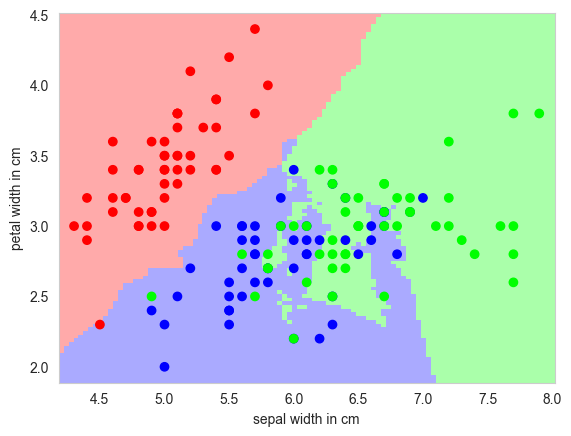

In [20]:
plot_iris_knn()

## Exercise

Attempt classification problem on iris dataset using `sklearn.svm.SVC` 

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris_flower = datasets.load_iris()
X,y = iris.data, iris.target

# use SVM to classify